In [ ]:
# for each repo
    # for each bug folder
        # iterate over file with the same name in `before` and `after`
            # compute diff
            # if diff is empty: nothing
            # else:
                # increase the counter of files, hunks, and lines for the bug
                
# iterate over 
        # read before folder
        # read after folder
        

In [21]:
import os
import difflib as dl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
FOLDER_A = "/home/paltenmo/Documents/QUANT-PROG/OOPSLA_21_Artifacts/Bugs-Quantum-Computing-Platforms/artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#567/before/"
FOLDER_B = "/home/paltenmo/Documents/QUANT-PROG/OOPSLA_21_Artifacts/Bugs-Quantum-Computing-Platforms/artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#567/after/"

In [4]:
# for each repo
    # for each bug folder
        # iterate over file with the same name in `before` and `after`
            # compute diff
            # if diff is empty: nothing
            # else:
                # increase the counter of files, hunks, and lines for the bug

                
def read_content(path):
    with open(path, 'r') as in_file:
        return in_file.read()
                
def iterate_over(folder_master, folder_slave): 
    """Iterate over file with the two folders, return the file contents.
    
    Note that only files in common are returned.
    """
    files_in_master = [
        f for f in os.listdir(folder_master)
        if os.path.isfile(os.path.join(folder_master, f))
    ]
    files_in_slave = [
        f for f in os.listdir(folder_slave)
        if os.path.isfile(os.path.join(folder_slave, f))
    ]
    files_in_common = set(files_in_master).intersection(set(files_in_slave))
    results = []
    
    for filename in files_in_common:
        file_master = os.path.join(folder_master, filename)
        file_slave = os.path.join(folder_slave, filename)
        print(file_master)
        print(file_slave)
        content_master = read_content(file_master)
        content_slave = read_content(file_slave)
        item = (filename, content_master, content_slave)
        results.append(item)
        
    return results

In [5]:
#iterate_over(folder_master=FOLDER_A, folder_slave=FOLDER_B)

In [6]:
os.listdir("../artifacts/minimal_commits_v02")

['mitiq',
 'qsharp-runtime',
 'strawberryfields',
 'tequila',
 'pennylane',
 'qiskit-terra',
 'qiskit-aer',
 'rules.md',
 'qsharp-compiler',
 'amazon-braket-sdk-python',
 'dwave-system',
 'qiskit-ignis',
 'OpenQL',
 'ProjectQ',
 'pyquil',
 'QuantumLibraries',
 'qulacs',
 'xacc',
 'Cirq']

In [7]:
def get_line_numbers(line):
    token = line.split(" ")
    numbers_old_file = token[1]
    numbers_new_file = token[2]
    delete_line_number = (
        int(numbers_old_file.split(",")[0].replace("-", "")) - 1
    )
    additions_line_number = int(numbers_new_file.split(",")[0]) - 1
    return delete_line_number, additions_line_number

def get_hunks(text_diff):
    """Extract the hunks form the unified diff."""
    lines = text_diff.split("\n")
    modified_lines = {
        "added": [],
        "deleted": [],
    }  # type: Dict[str, List[Tuple[int, str]]]

    count_deletions = 0
    count_additions = 0

    chunks = []
    
    # there are different section types: 
    # header, unchanged_text, add_section, del_section
    c_section = 'unchanged_text'
    prev_section = 'unchanged_text'
    chunk = {
        "added": [],
        "deleted": [],
    }
    
    for line in lines:
        line = line.rstrip()
        count_deletions += 1
        count_additions += 1

        
        if line.startswith("@@"):
            c_section = 'header'
            count_deletions, count_additions = get_line_numbers(line)
            # initialize a new dictionary for the change hunk
            chunk = {
                "added": [],
                "deleted": [],
            }
            
        elif line.startswith("-"):
            c_section = 'del_section'
            modified_lines["deleted"].append((count_deletions, line[1:]))
            count_additions -= 1
            # append this line as deleted line of this change hunk
            chunk["deleted"].append((count_deletions, line[1:]))

        elif line.startswith("+"):
            c_section = 'add_section'
            modified_lines["added"].append((count_additions, line[1:]))
            count_deletions -= 1
            # append this line as added line of this change hunk
            chunk["added"].append((count_additions, line[1:]))

        elif line == r"\ No newline at end of file":
            count_deletions -= 1
            count_additions -= 1
            
        else:
            c_section = 'unchanged_text'
            # if we came out of a change hunk section we can close this chunk
            # and append it to the chunks list
            if c_section != prev_section and prev_section != 'header':
                chunks.append(chunk)
                chunk = {
                    "added": [],
                    "deleted": [],
                }
        
        prev_section = c_section
        
    # flush the last change (if present)
    if len(chunk['added']) > 0 or len(chunk['deleted']) > 0:
        chunks.append(chunk)

    return chunks

In [60]:
diffs = dl.unified_diff(["ciao", "come"], ["ciao", "come"])
text_diff = "\n".join(list(diffs))
# remove the useless preface before the "@@" character
text_diff = text_diff[text_diff.find("@@"):]
print(name)
print(text_diff)
#print("-" * 80)
#print("HUNKS:")
#print("-" * 80)
hunks = get_hunks(text_diff)
print(hunks)
# count the lines
n_modified_lines = 0
for h_i, hunk in enumerate(hunks):
    print(f"Hunk {h_i}")

cvx_fit.py

[]


In [110]:
REPOS_FOLDER = "../artifacts/minimal_commits_v02"

repos = ["ProjectQ", "qiskit-aer", "qiskit-terra", "qiskit-ignis", "pennylane"] # os.listdir(REPOS_FOLDER)

reports = []

for reponame in repos:
    
    path_repo = os.path.join(REPOS_FOLDER, reponame)
    repo_bugs = os.listdir(path_repo)    
    
    for bug_folder_name in repo_bugs:      
        
        path_bug_folder = os.path.join(path_repo, bug_folder_name)
        
        folder_before = os.path.join(path_bug_folder, "before")
        folder_after = os.path.join(path_bug_folder, "after")
        
        # read metadata
        path_metadata = os.path.join(path_bug_folder, "metadata.json")
        with open(path_metadata, "r") as metadata_file:
            metadata = json.load(metadata_file)
        
        for name, content_before, content_after in iterate_over(
                folder_master=folder_before, 
                folder_slave=folder_after):
            diffs = dl.unified_diff(
                content_before.splitlines(False), 
                content_after.splitlines(False))
            text_diff = "\n".join(list(diffs))
            # remove the useless preface before the "@@" character
            text_diff = text_diff[text_diff.find("@@"):]
            print(name)
            print(text_diff)
            #print("-" * 80)
            #print("HUNKS:")
            #print("-" * 80)
            hunks = get_hunks(text_diff)
            # count the lines
            n_modified_lines = 0
            for h_i, hunk in enumerate(hunks):
                print(f"Hunk {h_i}")
                print(hunk)
                i_modified_lines = max(len(hunk["deleted"]), len(hunk["added"]))
                n_modified_lines += i_modified_lines
            # if the file has any change, store it
            if len(hunks) > 0:
                report = {
                    "n_lines": n_modified_lines,
                    "n_hunks": len(hunks),
                    "filename": name,
                    "n_files": 1,
                    **metadata
                }
                reports.append(report)

../artifacts/minimal_commits_v02/ProjectQ/ProjectQ#203/before/_pysim.py
../artifacts/minimal_commits_v02/ProjectQ/ProjectQ#203/after/_pysim.py
../artifacts/minimal_commits_v02/ProjectQ/ProjectQ#203/before/simulator.hpp
../artifacts/minimal_commits_v02/ProjectQ/ProjectQ#203/after/simulator.hpp
_pysim.py
@@ -351,6 +351,7 @@

         s = int(op_nrm + 1.)
         correction = _np.exp(-1j * time * tr / float(s))
         output_state = _np.copy(self._state)
+        mask = self._get_control_mask(ctrlids)
         for i in range(s):
             j = 0
             nrm_change = 1.
@@ -359,16 +360,20 @@

                 current_state = _np.copy(self._state)
                 update = 0j
                 for t, c in terms_dict:
-                    self._apply_term(t, ids, ctrlids)
+                    self._apply_term(t, ids)
                     self._state *= c
                     update += self._state
                     self._state = _np.copy(current_state)
                 update *= c

tape.py
@@ -648,10 +648,25 @@

         self.trainable_params = {parameter_mapping[i] for i in self.trainable_params}
         self._par_info = {parameter_mapping[k]: v for k, v in self._par_info.items()}
 
-        for op in self._ops:
-            op.inverse = not op.inverse
+        for idx, op in enumerate(self._ops):
+            try:
+                self._ops[idx] = op.adjoint()
+            except NotImplementedError:
+                op.inverse = not op.inverse
 
         self._ops = list(reversed(self._ops))
+
+    def adjoint(self):
+        new_tape = self.copy(copy_operations=True)
+        qml.transforms.invisible(new_tape.inv)()
+        QuantumTape._lock.acquire()
+        try:
+            QueuingContext.append(new_tape)
+        except Exception as _:
+            QuantumTape._lock.release()
+            raise
+        QuantumTape._lock.release()
+        return new_tape
 
     # ========================================================
     # Parameter handling
Hunk 0

In [111]:

df_reports = pd.DataFrame.from_records(reports)

In [112]:
df_reports.head()

,n_lines,n_hunks,filename,n_files,commit_hash,commit_msg,project_name,id,human_id,author_comment
0,8,4,_pysim.py,1,62d3fb11578a06131b0105b220651520b2a7338b,Add fix and test for emulation of controlled t...,ProjectQ,1116,ProjectQ#203,Bug: change code logic in the simulator to cre...
1,8,4,simulator.hpp,1,62d3fb11578a06131b0105b220651520b2a7338b,Add fix and test for emulation of controlled t...,ProjectQ,1116,ProjectQ#203,Bug: change code logic in the simulator to cre...
2,5,1,stateprep2cnot.py,1,11f45873e20c2fa78fab2b59b5b460ac5f595fc6,Fix StatePreparation division by 0 and update ...,ProjectQ,1118,ProjectQ#255,fix division by 0
3,2,1,setup.py,1,88e2f1823748a82d1f3ad5e877b3a9b1f2aa43ad,Bugfix OpenMP flags in setup.py (#121),ProjectQ,1112,ProjectQ#121,"Fixer: ""Bugfix OpenMP flags in setup.py: chang..."
4,49,11,tutorials.rst,1,88e2f1823748a82d1f3ad5e877b3a9b1f2aa43ad,Bugfix OpenMP flags in setup.py (#121),ProjectQ,1112,ProjectQ#121,"Fixer: ""Bugfix OpenMP flags in setup.py: chang..."


In [113]:
df_grouped = df_reports.groupby(by=["human_id", "id", "project_name", "commit_hash"]).sum().reset_index()
df_grouped["comprehensive_id"] = df_grouped.apply(
    lambda row: f'{row["human_id"]} ({row["id"]})',
    axis=1
)

In [114]:
df_grouped.head(20)

,human_id,id,project_name,commit_hash,n_lines,n_hunks,n_files,comprehensive_id
0,ProjectQ#101,1110,ProjectQ,81f94d479612418552d3b1d628d661dac6a1206c,1,1,1,ProjectQ#101 (1110)
1,ProjectQ#113,1111,ProjectQ,144c8d1cc06214ff4be2a4ed79d5fa9753c8265b,8,4,1,ProjectQ#113 (1111)
2,ProjectQ#121,1112,ProjectQ,88e2f1823748a82d1f3ad5e877b3a9b1f2aa43ad,51,12,2,ProjectQ#121 (1112)
3,ProjectQ#187,1115,ProjectQ,c703417beb3c97f73514d6f39320251a1c7dadab,3,3,2,ProjectQ#187 (1115)
4,ProjectQ#203,1116,ProjectQ,62d3fb11578a06131b0105b220651520b2a7338b,16,8,2,ProjectQ#203 (1116)
5,ProjectQ#25,1103,ProjectQ,81752a9880a6527fbd3b6ebf17ba00fc564979f3,13,1,1,ProjectQ#25 (1103)
6,ProjectQ#255,1118,ProjectQ,11f45873e20c2fa78fab2b59b5b460ac5f595fc6,5,1,1,ProjectQ#255 (1118)
7,ProjectQ#361,1121,ProjectQ,67ce24bd5d4aa06eb43c8e094c551c89567ef57d,7,1,1,ProjectQ#361 (1121)
8,ProjectQ#368,1122,ProjectQ,6ef8a0eeb06267b27bbbe9207b71013e9cca65d4,1,1,1,ProjectQ#368 (1122)
9,ProjectQ#383,1123,ProjectQ,c15f3b25dd2efc426507360a19b6b1dded2ec37e,4,1,1,ProjectQ#383 (1123)


100
40


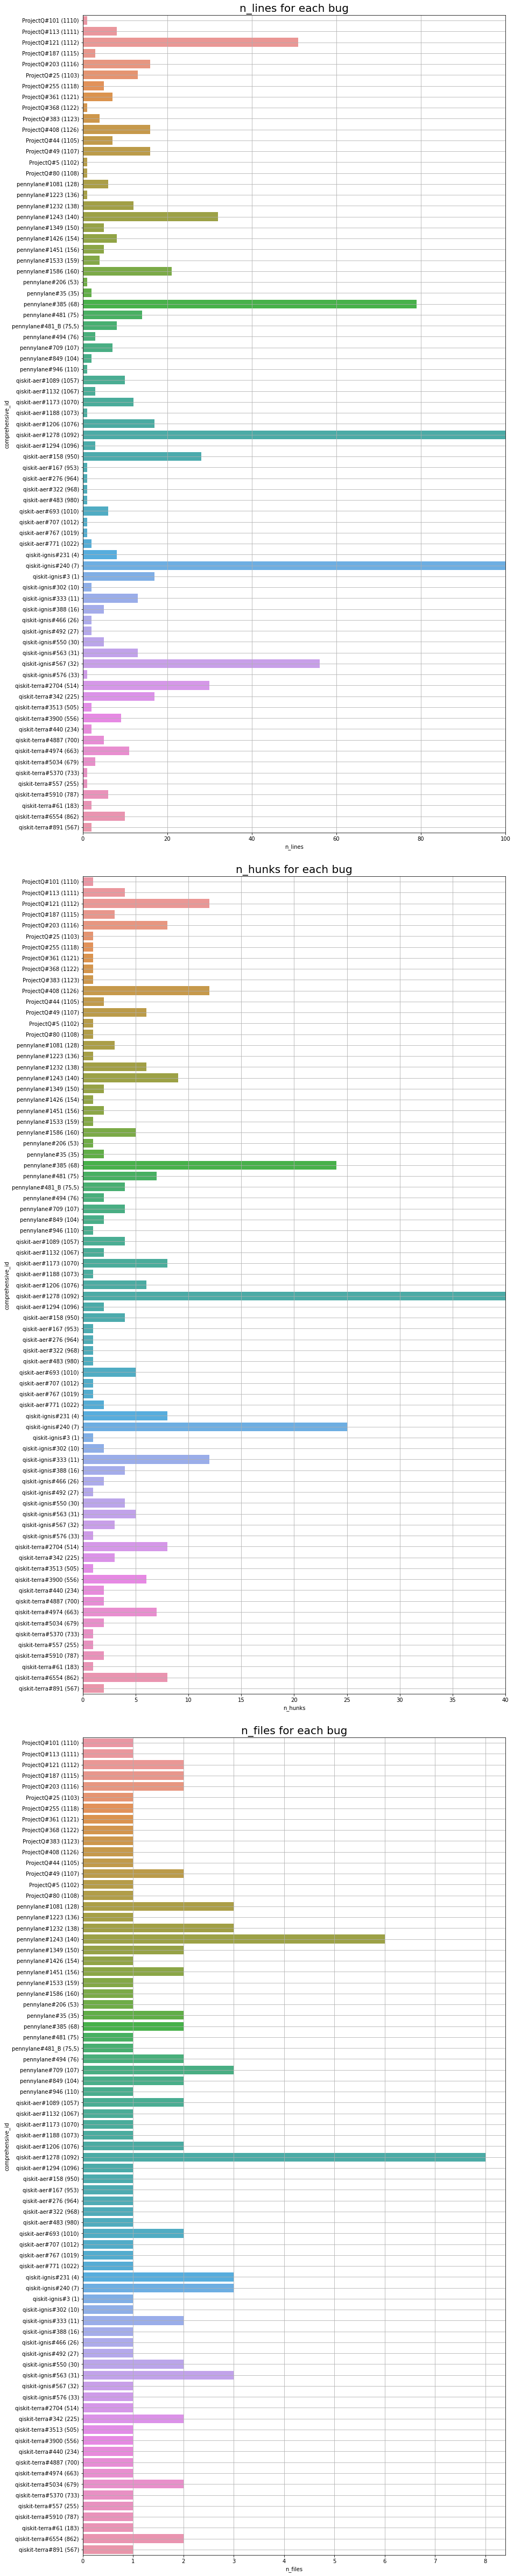

In [115]:
def plot_bug_level_summary(df):
    """Plot the summary for both id and human id of the relevent stats."""
    
    stats_shown = ["n_lines", "n_hunks", "n_files"]
    cap_at = [100, 40, None]
    n_stats_shown = len(stats_shown)
    
    n_bugs = len(df)
    height = (.3 * n_bugs) * n_stats_shown
    
    fig, axes = plt.subplots(n_stats_shown, 1, figsize=(13, height))
    plt.tight_layout(pad=6)
    for stat_i, stat_name in enumerate(stats_shown):   
        ax_stat = axes[stat_i]
        # Number of lines
        sns.barplot(
            data=df,
            y="comprehensive_id",
            x=stat_name,
            ax = ax_stat
        ) 
        ax_stat.set_title(f"{stat_name} for each bug", fontsize=20)
        if cap_at[stat_i] is not None:
            print(cap_at[stat_i])
            ax_stat.set_xlim(0, cap_at[stat_i])
        
        ax_stat.grid()
    
plot_bug_level_summary(df=df_grouped)

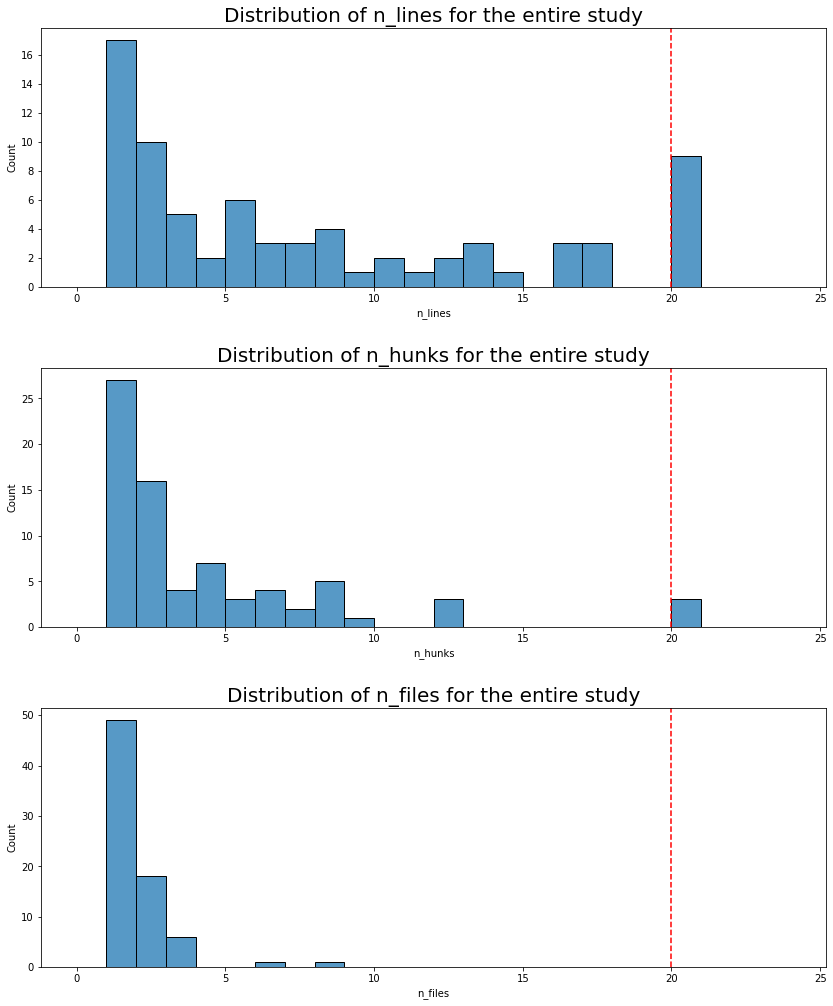

In [117]:
from copy import deepcopy

def plot_study_summary(df):
    """Plot the summary for both id and human id of the relevent stats."""
    df = deepcopy(df)
    stats_shown = ["n_lines", "n_hunks", "n_files"]
    cap_at = [20, 20, 20]
    n_stats_shown = len(stats_shown)
    
    n_bugs = len(df)
    
    fig, axes = plt.subplots(n_stats_shown, 1, figsize=(13, 15))
    plt.tight_layout(pad=6)
    for stat_i, stat_name in enumerate(stats_shown):   
        ax_stat = axes[stat_i]
        
        if cap_at[stat_i] is not None:
            df[stat_name] = df[stat_name].apply(
                lambda e: e if e < cap_at[stat_i] else cap_at[stat_i] 
            )
        
        # Number of lines
        sns.histplot(
            data=df,
            x=stat_name,
            bins=range(cap_at[stat_i] + 5) if cap_at[stat_i] is not None else range(20),
            ax = ax_stat
        )  
        if cap_at[stat_i] is not None:
            ax_stat.axvline(x=cap_at[stat_i], c="r", linestyle="--")
        ax_stat.set_title(f"Distribution of {stat_name} for the entire study", fontsize=20)
plot_study_summary(df_grouped)